# **Intro. to ML LAB 1**

## Importing necessary libries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import shap

C:\Users\Chirantha Ravishan\AppData\Local\Temp\ipykernel_12752\4159597586.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


## Importing the datasets

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("valid.csv")
X_test = pd.read_csv("X_test.csv")

In [3]:
train.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0 NaN        NaN      14000        14000          14000.0   36 months   
1 NaN        NaN       2000         2000           2000.0   36 months   
2 NaN        NaN       5000         5000           4750.0   36 months   
3 NaN        NaN      20600        20600          20600.0   36 months   
4 NaN        NaN      10000        10000          10000.0   36 months   

   int_rate  installment grade sub_grade  ... hardship_last_payment_amount  \
0      7.35       434.53     A        A4  ...                          NaN   
1     16.29        70.61     D        D2  ...                          NaN   
2      7.39       155.28     A        A4  ...                          NaN   
3     11.99       684.12     B        B5  ...                          NaN   
4      7.39       310.56     A        A4  ...                          NaN   

  disbursement_method debt_settlement_flag  debt_settlement_flag_date  \
0                Cash                    N                        NaN   
1                Cash                    N                        NaN   
2                Cash                    N                        NaN   
3                Cash                    N                        NaN   
4                Cash                    N                        NaN   

  settlement_status settlement_date settlement_amount  settlement_percentage  \
0               NaN             NaN               NaN                    NaN   
1               NaN             NaN               NaN                    NaN   
2               NaN             NaN               NaN                    NaN   
3               NaN             NaN               NaN                    NaN   
4               NaN             NaN               NaN                    NaN   

  settlement_term loan_status  
0             NaN           1  
1             NaN           1  
2             NaN           1  
3             NaN           1  
4             NaN           1  

[5 rows x 145 columns]

In [4]:
train.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'hardship_last_payment_amount', 'disbursement_method',
       'debt_settlement_flag', 'debt_settlement_flag_date',
       'settlement_status', 'settlement_date', 'settlement_amount',
       'settlement_percentage', 'settlement_term', 'loan_status'],
      dtype='object', length=145)

In [5]:
unique_value_counts = train.nunique()
print(unique_value_counts)

id                           0
member_id                    0
loan_amnt                 1496
funded_amnt               1496
funded_amnt_inv           4405
                         ...  
settlement_date             82
settlement_amount        14338
settlement_percentage     1445
settlement_term             38
loan_status                  2
Length: 145, dtype: int64


#### Dropping the empty columns

In [6]:
train.dropna(axis = 1 , inplace=True)
test.dropna(axis = 1 , inplace=True)
X_test.dropna(axis = 1 , inplace=True)

In [7]:
train.head()

loan_amnt  funded_amnt  funded_amnt_inv        term  int_rate  installment  \
0      14000        14000          14000.0   36 months      7.35       434.53   
1       2000         2000           2000.0   36 months     16.29        70.61   
2       5000         5000           4750.0   36 months      7.39       155.28   
3      20600        20600          20600.0   36 months     11.99       684.12   
4      10000        10000          10000.0   36 months      7.39       310.56   

  grade sub_grade home_ownership  annual_inc  ... collection_recovery_fee  \
0     A        A4       MORTGAGE     44000.0  ...                     0.0   
1     D        D2       MORTGAGE     11420.0  ...                     0.0   
2     A        A4       MORTGAGE     65000.0  ...                     0.0   
3     B        B5       MORTGAGE     46956.0  ...                     0.0   
4     A        A4       MORTGAGE    115000.0  ...                     0.0   

  last_pymnt_amnt policy_code application_type acc_now_delinq  delinq_amnt  \
0         8611.87           1       Individual            0.0          0.0   
1           70.18           1       Individual            0.0          0.0   
2         2662.94           1       Individual            0.0          0.0   
3          683.96           1       Individual            0.0          0.0   
4         4753.53           1       Individual            0.0          0.0   

  hardship_flag  disbursement_method  debt_settlement_flag  loan_status  
0             N                 Cash                     N            1  
1             N                 Cash                     N            1  
2             N                 Cash                     N            1  
3             N                 Cash                     N            1  
4             N                 Cash                     N            1  

[5 rows x 41 columns]

#### Dropping the columns which have the same value in every record

In [8]:
unique_value_counts = train.nunique()
print(unique_value_counts)

loan_amnt                    1496
funded_amnt                  1496
funded_amnt_inv              4405
term                            2
int_rate                      626
installment                 63290
grade                           7
sub_grade                      35
home_ownership                  6
annual_inc                  32670
verification_status             3
issue_d                       138
pymnt_plan                      1
purpose                        14
addr_state                     51
delinq_2yrs                    27
earliest_cr_line              709
inq_last_6mths                  9
open_acc                       68
pub_rec                        27
revol_bal                   61857
total_acc                     121
initial_list_status             2
out_prncp                       1
out_prncp_inv                   1
total_pymnt                496397
total_pymnt_inv            448284
total_rec_prncp            131175
total_rec_int              313229
total_rec_late

In [9]:
columns_to_drop = unique_value_counts[unique_value_counts==1].index
train.drop(columns=columns_to_drop , inplace=True)

unique_value_counts_test = test.nunique()
columns_to_drop_test = unique_value_counts_test[unique_value_counts_test==1].index
test.drop(columns=columns_to_drop_test , inplace=True)

unique_value_counts_X = X_test.nunique()
columns_to_drop_X = unique_value_counts_X[unique_value_counts_X==1].index
X_test.drop(columns=columns_to_drop_X , inplace=True)

In [10]:
train.head()

loan_amnt  funded_amnt  funded_amnt_inv        term  int_rate  installment  \
0      14000        14000          14000.0   36 months      7.35       434.53   
1       2000         2000           2000.0   36 months     16.29        70.61   
2       5000         5000           4750.0   36 months      7.39       155.28   
3      20600        20600          20600.0   36 months     11.99       684.12   
4      10000        10000          10000.0   36 months      7.39       310.56   

  grade sub_grade home_ownership  annual_inc  ... total_rec_late_fee  \
0     A        A4       MORTGAGE     44000.0  ...                0.0   
1     D        D2       MORTGAGE     11420.0  ...                0.0   
2     A        A4       MORTGAGE     65000.0  ...                0.0   
3     B        B5       MORTGAGE     46956.0  ...                0.0   
4     A        A4       MORTGAGE    115000.0  ...                0.0   

  recoveries collection_recovery_fee last_pymnt_amnt  application_type  \
0        0.0                     0.0         8611.87        Individual   
1        0.0                     0.0           70.18        Individual   
2        0.0                     0.0         2662.94        Individual   
3        0.0                     0.0          683.96        Individual   
4        0.0                     0.0         4753.53        Individual   

  acc_now_delinq  delinq_amnt  disbursement_method  debt_settlement_flag  \
0            0.0          0.0                 Cash                     N   
1            0.0          0.0                 Cash                     N   
2            0.0          0.0                 Cash                     N   
3            0.0          0.0                 Cash                     N   
4            0.0          0.0                 Cash                     N   

   loan_status  
0            1  
1            1  
2            1  
3            1  
4            1  

[5 rows x 36 columns]

In [11]:
print(train.dtypes)

loan_amnt                    int64
funded_amnt                  int64
funded_amnt_inv            float64
term                        object
int_rate                   float64
installment                float64
grade                       object
sub_grade                   object
home_ownership              object
annual_inc                 float64
verification_status         object
issue_d                     object
purpose                     object
addr_state                  object
delinq_2yrs                float64
earliest_cr_line            object
inq_last_6mths             float64
open_acc                   float64
pub_rec                    float64
revol_bal                    int64
total_acc                  float64
initial_list_status         object
total_pymnt                float64
total_pymnt_inv            float64
total_rec_prncp            float64
total_rec_int              float64
total_rec_late_fee         float64
recoveries                 float64
collection_recovery_

In [12]:
test.head()

loan_amnt  funded_amnt  funded_amnt_inv        term  int_rate  installment  \
0      14575        14575          14575.0   60 months     17.57       366.71   
1      10000        10000          10000.0   36 months     13.59       339.79   
2      17000        17000          17000.0   36 months     13.35       575.67   
3       4500         4500           4500.0   36 months      9.93       145.06   
4       6250         6250           6250.0   36 months     12.99       210.56   

  grade sub_grade home_ownership  annual_inc  ... recoveries  \
0     D        D2           RENT     36500.0  ...        0.0   
1     C        C2           RENT     66000.0  ...        0.0   
2     C        C2       MORTGAGE     65000.0  ...        0.0   
3     B        B2           RENT     21600.0  ...        0.0   
4     B        B4           RENT     35000.0  ...        0.0   

  collection_recovery_fee last_pymnt_amnt application_type acc_now_delinq  \
0                     0.0         1799.88       Individual            0.0   
1                     0.0         5612.73       Individual            0.0   
2                     0.0         2272.98       Individual            0.0   
3                     0.0         4452.14       Individual            0.0   
4                     0.0         2587.58       Individual            0.0   

   delinq_amnt hardship_flag  disbursement_method  debt_settlement_flag  \
0          0.0             N                 Cash                     N   
1          0.0             N                 Cash                     N   
2          0.0             N                 Cash                     N   
3          0.0             N                 Cash                     N   
4          0.0             N                 Cash                     N   

   loan_status  
0            1  
1            1  
2            1  
3            1  
4            1  

[5 rows x 38 columns]

In [13]:
train.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'purpose', 'addr_state',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'total_acc', 'initial_list_status',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'application_type', 'acc_now_delinq', 'delinq_amnt',
       'disbursement_method', 'debt_settlement_flag', 'loan_status'],
      dtype='object')

In [14]:
test.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'purpose', 'zip_code', 'addr_state',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'total_acc', 'initial_list_status',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'application_type', 'acc_now_delinq', 'delinq_amnt',
       'hardship_flag', 'disbursement_method', 'debt_settlement_flag',
       'loan_status'],
      dtype='object')

In [15]:
test.drop(labels= ["zip_code", "hardship_flag"] , axis = 1 , inplace=True)
X_test.drop(labels= ["zip_code"] , axis = 1 , inplace=True)

In [16]:
test.head()

loan_amnt  funded_amnt  funded_amnt_inv        term  int_rate  installment  \
0      14575        14575          14575.0   60 months     17.57       366.71   
1      10000        10000          10000.0   36 months     13.59       339.79   
2      17000        17000          17000.0   36 months     13.35       575.67   
3       4500         4500           4500.0   36 months      9.93       145.06   
4       6250         6250           6250.0   36 months     12.99       210.56   

  grade sub_grade home_ownership  annual_inc  ... total_rec_late_fee  \
0     D        D2           RENT     36500.0  ...                0.0   
1     C        C2           RENT     66000.0  ...                0.0   
2     C        C2       MORTGAGE     65000.0  ...                0.0   
3     B        B2           RENT     21600.0  ...                0.0   
4     B        B4           RENT     35000.0  ...                0.0   

  recoveries collection_recovery_fee last_pymnt_amnt  application_type  \
0        0.0                     0.0         1799.88        Individual   
1        0.0                     0.0         5612.73        Individual   
2        0.0                     0.0         2272.98        Individual   
3        0.0                     0.0         4452.14        Individual   
4        0.0                     0.0         2587.58        Individual   

  acc_now_delinq  delinq_amnt  disbursement_method  debt_settlement_flag  \
0            0.0          0.0                 Cash                     N   
1            0.0          0.0                 Cash                     N   
2            0.0          0.0                 Cash                     N   
3            0.0          0.0                 Cash                     N   
4            0.0          0.0                 Cash                     N   

   loan_status  
0            1  
1            1  
2            1  
3            1  
4            1  

[5 rows x 36 columns]

In [17]:
train.head()

loan_amnt  funded_amnt  funded_amnt_inv        term  int_rate  installment  \
0      14000        14000          14000.0   36 months      7.35       434.53   
1       2000         2000           2000.0   36 months     16.29        70.61   
2       5000         5000           4750.0   36 months      7.39       155.28   
3      20600        20600          20600.0   36 months     11.99       684.12   
4      10000        10000          10000.0   36 months      7.39       310.56   

  grade sub_grade home_ownership  annual_inc  ... total_rec_late_fee  \
0     A        A4       MORTGAGE     44000.0  ...                0.0   
1     D        D2       MORTGAGE     11420.0  ...                0.0   
2     A        A4       MORTGAGE     65000.0  ...                0.0   
3     B        B5       MORTGAGE     46956.0  ...                0.0   
4     A        A4       MORTGAGE    115000.0  ...                0.0   

  recoveries collection_recovery_fee last_pymnt_amnt  application_type  \
0        0.0                     0.0         8611.87        Individual   
1        0.0                     0.0           70.18        Individual   
2        0.0                     0.0         2662.94        Individual   
3        0.0                     0.0          683.96        Individual   
4        0.0                     0.0         4753.53        Individual   

  acc_now_delinq  delinq_amnt  disbursement_method  debt_settlement_flag  \
0            0.0          0.0                 Cash                     N   
1            0.0          0.0                 Cash                     N   
2            0.0          0.0                 Cash                     N   
3            0.0          0.0                 Cash                     N   
4            0.0          0.0                 Cash                     N   

   loan_status  
0            1  
1            1  
2            1  
3            1  
4            1  

[5 rows x 36 columns]

In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517788 entries, 0 to 517787
Data columns (total 36 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   loan_amnt                517788 non-null  int64  
 1   funded_amnt              517788 non-null  int64  
 2   funded_amnt_inv          517788 non-null  float64
 3   term                     517788 non-null  object 
 4   int_rate                 517788 non-null  float64
 5   installment              517788 non-null  float64
 6   grade                    517788 non-null  object 
 7   sub_grade                517788 non-null  object 
 8   home_ownership           517788 non-null  object 
 9   annual_inc               517788 non-null  float64
 10  verification_status      517788 non-null  object 
 11  issue_d                  517788 non-null  object 
 12  purpose                  517788 non-null  object 
 13  addr_state               517788 non-null  object 
 14  deli

## Encoding

#### Binary encoding the column "term" using Ordinal Encoder

In [19]:
train["term"].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [20]:
term_order = [" 60 months"," 36 months"]
oe = OrdinalEncoder(categories=[term_order])
train[["term"]] = oe.fit_transform(train[["term"]])

test[["term"]] = oe.fit_transform(test[["term"]])
X_test[["term"]] = oe.fit_transform(X_test[["term"]])

In [21]:
train.head()

loan_amnt  funded_amnt  funded_amnt_inv  term  int_rate  installment grade  \
0      14000        14000          14000.0   1.0      7.35       434.53     A   
1       2000         2000           2000.0   1.0     16.29        70.61     D   
2       5000         5000           4750.0   1.0      7.39       155.28     A   
3      20600        20600          20600.0   1.0     11.99       684.12     B   
4      10000        10000          10000.0   1.0      7.39       310.56     A   

  sub_grade home_ownership  annual_inc  ... total_rec_late_fee recoveries  \
0        A4       MORTGAGE     44000.0  ...                0.0        0.0   
1        D2       MORTGAGE     11420.0  ...                0.0        0.0   
2        A4       MORTGAGE     65000.0  ...                0.0        0.0   
3        B5       MORTGAGE     46956.0  ...                0.0        0.0   
4        A4       MORTGAGE    115000.0  ...                0.0        0.0   

  collection_recovery_fee last_pymnt_amnt  application_type acc_now_delinq  \
0                     0.0         8611.87        Individual            0.0   
1                     0.0           70.18        Individual            0.0   
2                     0.0         2662.94        Individual            0.0   
3                     0.0          683.96        Individual            0.0   
4                     0.0         4753.53        Individual            0.0   

   delinq_amnt  disbursement_method  debt_settlement_flag  loan_status  
0          0.0                 Cash                     N            1  
1          0.0                 Cash                     N            1  
2          0.0                 Cash                     N            1  
3          0.0                 Cash                     N            1  
4          0.0                 Cash                     N            1  

[5 rows x 36 columns]

In [22]:
train.tail()

loan_amnt  funded_amnt  funded_amnt_inv  term  int_rate  installment  \
517783       3600         3600           3600.0   1.0     20.31       134.36   
517784       8000         8000           8000.0   1.0     13.99       273.39   
517785      14000        14000          13925.0   0.0     18.25       357.42   
517786       5200         5200           5200.0   1.0     17.27       186.10   
517787       8000         8000           8000.0   1.0      7.12       247.46   

       grade sub_grade home_ownership  annual_inc  ... total_rec_late_fee  \
517783     D        D5           RENT    48000.00  ...          14.991083   
517784     C        C3       MORTGAGE    68789.76  ...           0.000000   
517785     D        D3       MORTGAGE    86000.00  ...           0.000000   
517786     C        C5       MORTGAGE    70000.00  ...           0.000000   
517787     A        A3       MORTGAGE    90000.00  ...           0.000000   

       recoveries collection_recovery_fee last_pymnt_amnt  application_type  \
517783     413.91                  4.1360          134.36        Individual   
517784       0.00                  0.0000         4040.19        Individual   
517785    1860.08                 18.6008          357.42        Individual   
517786       0.00                  0.0000          185.80        Individual   
517787       0.00                  0.0000          737.95        Individual   

       acc_now_delinq  delinq_amnt  disbursement_method  debt_settlement_flag  \
517783            0.0          0.0                 Cash                     N   
517784            0.0          0.0                 Cash                     N   
517785            0.0          0.0                 Cash                     N   
517786            0.0          0.0                 Cash                     N   
517787            0.0          0.0                 Cash                     N   

        loan_status  
517783            0  
517784            1  
517785            0  
517786            1  
517787            1  

[5 rows x 36 columns]

In [23]:
test.head()

loan_amnt  funded_amnt  funded_amnt_inv  term  int_rate  installment grade  \
0      14575        14575          14575.0   0.0     17.57       366.71     D   
1      10000        10000          10000.0   1.0     13.59       339.79     C   
2      17000        17000          17000.0   1.0     13.35       575.67     C   
3       4500         4500           4500.0   1.0      9.93       145.06     B   
4       6250         6250           6250.0   1.0     12.99       210.56     B   

  sub_grade home_ownership  annual_inc  ... total_rec_late_fee recoveries  \
0        D2           RENT     36500.0  ...                0.0        0.0   
1        C2           RENT     66000.0  ...                0.0        0.0   
2        C2       MORTGAGE     65000.0  ...                0.0        0.0   
3        B2           RENT     21600.0  ...                0.0        0.0   
4        B4           RENT     35000.0  ...                0.0        0.0   

  collection_recovery_fee last_pymnt_amnt  application_type acc_now_delinq  \
0                     0.0         1799.88        Individual            0.0   
1                     0.0         5612.73        Individual            0.0   
2                     0.0         2272.98        Individual            0.0   
3                     0.0         4452.14        Individual            0.0   
4                     0.0         2587.58        Individual            0.0   

   delinq_amnt  disbursement_method  debt_settlement_flag  loan_status  
0          0.0                 Cash                     N            1  
1          0.0                 Cash                     N            1  
2          0.0                 Cash                     N            1  
3          0.0                 Cash                     N            1  
4          0.0                 Cash                     N            1  

[5 rows x 36 columns]

In [24]:
train["grade"].unique()

array(['A', 'D', 'B', 'C', 'E', 'F', 'G'], dtype=object)

#### Function to encode the "grades" column

In [25]:
def encode_grades(grades):
    if grades == 'G': return 0
    if grades == 'F': return 1
    if grades == 'E': return 2
    if grades == 'D': return 3
    if grades == 'C': return 4
    if grades == 'B': return 5
    if grades == 'A': return 6

train["grade"] = train["grade"].apply(encode_grades)

In [26]:
train.head()

loan_amnt  funded_amnt  funded_amnt_inv  term  int_rate  installment  \
0      14000        14000          14000.0   1.0      7.35       434.53   
1       2000         2000           2000.0   1.0     16.29        70.61   
2       5000         5000           4750.0   1.0      7.39       155.28   
3      20600        20600          20600.0   1.0     11.99       684.12   
4      10000        10000          10000.0   1.0      7.39       310.56   

   grade sub_grade home_ownership  annual_inc  ... total_rec_late_fee  \
0      6        A4       MORTGAGE     44000.0  ...                0.0   
1      3        D2       MORTGAGE     11420.0  ...                0.0   
2      6        A4       MORTGAGE     65000.0  ...                0.0   
3      5        B5       MORTGAGE     46956.0  ...                0.0   
4      6        A4       MORTGAGE    115000.0  ...                0.0   

  recoveries collection_recovery_fee last_pymnt_amnt  application_type  \
0        0.0                     0.0         8611.87        Individual   
1        0.0                     0.0           70.18        Individual   
2        0.0                     0.0         2662.94        Individual   
3        0.0                     0.0          683.96        Individual   
4        0.0                     0.0         4753.53        Individual   

  acc_now_delinq  delinq_amnt  disbursement_method  debt_settlement_flag  \
0            0.0          0.0                 Cash                     N   
1            0.0          0.0                 Cash                     N   
2            0.0          0.0                 Cash                     N   
3            0.0          0.0                 Cash                     N   
4            0.0          0.0                 Cash                     N   

   loan_status  
0            1  
1            1  
2            1  
3            1  
4            1  

[5 rows x 36 columns]

In [27]:
#Since grades and subgrades show a higher correlation "grades" column is dropped
train.drop(labels=["grade"] , axis = 1 , inplace=True)
test.drop(labels=["grade"] , axis = 1 , inplace=True)
X_test.drop(labels=["grade"] , axis = 1 , inplace=True)

In [28]:
train.head()

loan_amnt  funded_amnt  funded_amnt_inv  term  int_rate  installment  \
0      14000        14000          14000.0   1.0      7.35       434.53   
1       2000         2000           2000.0   1.0     16.29        70.61   
2       5000         5000           4750.0   1.0      7.39       155.28   
3      20600        20600          20600.0   1.0     11.99       684.12   
4      10000        10000          10000.0   1.0      7.39       310.56   

  sub_grade home_ownership  annual_inc verification_status  ...  \
0        A4       MORTGAGE     44000.0        Not Verified  ...   
1        D2       MORTGAGE     11420.0            Verified  ...   
2        A4       MORTGAGE     65000.0        Not Verified  ...   
3        B5       MORTGAGE     46956.0     Source Verified  ...   
4        A4       MORTGAGE    115000.0     Source Verified  ...   

  total_rec_late_fee recoveries collection_recovery_fee  last_pymnt_amnt  \
0                0.0        0.0                     0.0          8611.87   
1                0.0        0.0                     0.0            70.18   
2                0.0        0.0                     0.0          2662.94   
3                0.0        0.0                     0.0           683.96   
4                0.0        0.0                     0.0          4753.53   

  application_type  acc_now_delinq  delinq_amnt  disbursement_method  \
0       Individual             0.0          0.0                 Cash   
1       Individual             0.0          0.0                 Cash   
2       Individual             0.0          0.0                 Cash   
3       Individual             0.0          0.0                 Cash   
4       Individual             0.0          0.0                 Cash   

   debt_settlement_flag  loan_status  
0                     N            1  
1                     N            1  
2                     N            1  
3                     N            1  
4                     N            1  

[5 rows x 35 columns]

In [29]:
train["sub_grade"].unique()


array(['A4', 'D2', 'B5', 'C4', 'C1', 'B2', 'A5', 'E1', 'C5', 'A3', 'D5',
       'E3', 'B1', 'C3', 'B3', 'D3', 'B4', 'D4', 'C2', 'A1', 'F4', 'D1',
       'A2', 'F1', 'E2', 'G4', 'E4', 'F2', 'F3', 'G2', 'G5', 'F5', 'E5',
       'G1', 'G3'], dtype=object)

#### Function to encode the "sub_grade" column

In [30]:
train["sub_grade"] = train["sub_grade"].astype(str)
test["sub_grade"] = test["sub_grade"].astype(str)
X_test["sub_grade"] = X_test["sub_grade"].astype(str)

def encode_subgrades(term):
    letter_part = term[0]
    number_part = int(term[1])
    letter_value = ord(letter_part) - ord('A') + 1
    encoded_value = (letter_value - 1)*5 + number_part
    return encoded_value


train["sub_grade"] = train["sub_grade"].apply(encode_subgrades)
test["sub_grade"] = test["sub_grade"].apply(encode_subgrades)
X_test["sub_grade"] = X_test["sub_grade"].apply(encode_subgrades)

In [31]:
train.head()

loan_amnt  funded_amnt  funded_amnt_inv  term  int_rate  installment  \
0      14000        14000          14000.0   1.0      7.35       434.53   
1       2000         2000           2000.0   1.0     16.29        70.61   
2       5000         5000           4750.0   1.0      7.39       155.28   
3      20600        20600          20600.0   1.0     11.99       684.12   
4      10000        10000          10000.0   1.0      7.39       310.56   

   sub_grade home_ownership  annual_inc verification_status  ...  \
0          4       MORTGAGE     44000.0        Not Verified  ...   
1         17       MORTGAGE     11420.0            Verified  ...   
2          4       MORTGAGE     65000.0        Not Verified  ...   
3         10       MORTGAGE     46956.0     Source Verified  ...   
4          4       MORTGAGE    115000.0     Source Verified  ...   

  total_rec_late_fee recoveries collection_recovery_fee  last_pymnt_amnt  \
0                0.0        0.0                     0.0          8611.87   
1                0.0        0.0                     0.0            70.18   
2                0.0        0.0                     0.0          2662.94   
3                0.0        0.0                     0.0           683.96   
4                0.0        0.0                     0.0          4753.53   

  application_type  acc_now_delinq  delinq_amnt  disbursement_method  \
0       Individual             0.0          0.0                 Cash   
1       Individual             0.0          0.0                 Cash   
2       Individual             0.0          0.0                 Cash   
3       Individual             0.0          0.0                 Cash   
4       Individual             0.0          0.0                 Cash   

   debt_settlement_flag  loan_status  
0                     N            1  
1                     N            1  
2                     N            1  
3                     N            1  
4                     N            1  

[5 rows x 35 columns]

In [32]:
test.head()

loan_amnt  funded_amnt  funded_amnt_inv  term  int_rate  installment  \
0      14575        14575          14575.0   0.0     17.57       366.71   
1      10000        10000          10000.0   1.0     13.59       339.79   
2      17000        17000          17000.0   1.0     13.35       575.67   
3       4500         4500           4500.0   1.0      9.93       145.06   
4       6250         6250           6250.0   1.0     12.99       210.56   

   sub_grade home_ownership  annual_inc verification_status  ...  \
0         17           RENT     36500.0     Source Verified  ...   
1         12           RENT     66000.0     Source Verified  ...   
2         12       MORTGAGE     65000.0            Verified  ...   
3          7           RENT     21600.0     Source Verified  ...   
4          9           RENT     35000.0        Not Verified  ...   

  total_rec_late_fee recoveries collection_recovery_fee  last_pymnt_amnt  \
0                0.0        0.0                     0.0          1799.88   
1                0.0        0.0                     0.0          5612.73   
2                0.0        0.0                     0.0          2272.98   
3                0.0        0.0                     0.0          4452.14   
4                0.0        0.0                     0.0          2587.58   

  application_type  acc_now_delinq  delinq_amnt  disbursement_method  \
0       Individual             0.0          0.0                 Cash   
1       Individual             0.0          0.0                 Cash   
2       Individual             0.0          0.0                 Cash   
3       Individual             0.0          0.0                 Cash   
4       Individual             0.0          0.0                 Cash   

   debt_settlement_flag  loan_status  
0                     N            1  
1                     N            1  
2                     N            1  
3                     N            1  
4                     N            1  

[5 rows x 35 columns]

#### Encoding the column "home_ownership" to multiple boolean columns using OneHot Encoder

In [33]:
train["home_ownership"].unique()

array(['MORTGAGE', 'RENT', 'OWN', 'ANY', 'OTHER', 'NONE'], dtype=object)

In [34]:
ohe = OneHotEncoder()
feature_array = ohe.fit_transform(train[["home_ownership"]]).toarray()
feature_labels = ohe.categories_
feature_labels = np.array(feature_labels).ravel()
feature = pd.DataFrame(feature_array , columns=feature_labels)
train = pd.concat([train , feature] , axis=1)

ohe_3 = OneHotEncoder()
feature_array_3 = ohe_3.fit_transform(test[["home_ownership"]]).toarray()
feature_labels_3 = ohe_3.categories_
feature_labels_3 = np.array(feature_labels_3).ravel()
feature_3 = pd.DataFrame(feature_array_3 , columns=feature_labels_3)
test = pd.concat([test , feature_3] , axis=1)

ohe_7 = OneHotEncoder()
feature_array_7 = ohe_7.fit_transform(X_test[["home_ownership"]]).toarray()
feature_labels_7 = ohe_7.categories_
feature_labels_7 = np.array(feature_labels_7).ravel()
feature_7 = pd.DataFrame(feature_array_7 , columns=feature_labels_7)
X_test = pd.concat([X_test , feature_7] , axis=1)

#### Encoding the column "verification_status" using Label Encoder

In [35]:
train["verification_status"].unique()

array(['Not Verified', 'Verified', 'Source Verified'], dtype=object)

In [36]:
le = LabelEncoder()
train["verification_status"] = le.fit_transform(train["verification_status"])

le_1 = LabelEncoder()
test["verification_status"] = le_1.fit_transform(test["verification_status"])

le_4 = LabelEncoder()
X_test["verification_status"] = le_4.fit_transform(X_test["verification_status"])

In [37]:
train.head()

loan_amnt  funded_amnt  funded_amnt_inv  term  int_rate  installment  \
0      14000        14000          14000.0   1.0      7.35       434.53   
1       2000         2000           2000.0   1.0     16.29        70.61   
2       5000         5000           4750.0   1.0      7.39       155.28   
3      20600        20600          20600.0   1.0     11.99       684.12   
4      10000        10000          10000.0   1.0      7.39       310.56   

   sub_grade home_ownership  annual_inc  verification_status  ... delinq_amnt  \
0          4       MORTGAGE     44000.0                    0  ...         0.0   
1         17       MORTGAGE     11420.0                    2  ...         0.0   
2          4       MORTGAGE     65000.0                    0  ...         0.0   
3         10       MORTGAGE     46956.0                    1  ...         0.0   
4          4       MORTGAGE    115000.0                    1  ...         0.0   

  disbursement_method debt_settlement_flag  loan_status  ANY  MORTGAGE  NONE  \
0                Cash                    N            1  0.0       1.0   0.0   
1                Cash                    N            1  0.0       1.0   0.0   
2                Cash                    N            1  0.0       1.0   0.0   
3                Cash                    N            1  0.0       1.0   0.0   
4                Cash                    N            1  0.0       1.0   0.0   

   OTHER  OWN  RENT  
0    0.0  0.0   0.0  
1    0.0  0.0   0.0  
2    0.0  0.0   0.0  
3    0.0  0.0   0.0  
4    0.0  0.0   0.0  

[5 rows x 41 columns]

#### Dividing the column "issue_d" to date,month and year

In [38]:
train["issue_d"].unique()

array(['Aug-2017', 'Jul-2014', 'Mar-2016', 'Jan-2015', 'May-2016',
       'Jun-2015', 'Mar-2017', 'Aug-2014', 'Oct-2015', 'Feb-2015',
       'Aug-2015', 'Nov-2015', 'Dec-2014', 'Feb-2016', 'Jul-2011',
       'Jan-2014', 'Dec-2017', 'Jul-2015', 'Jan-2013', 'Jul-2017',
       'May-2017', 'Apr-2015', 'Jul-2012', 'Sep-2013', 'Nov-2012',
       'Sep-2017', 'Apr-2016', 'Sep-2012', 'Mar-2014', 'Feb-2017',
       'Dec-2015', 'Oct-2013', 'Jan-2017', 'Aug-2018', 'Nov-2013',
       'Apr-2017', 'Oct-2014', 'Jun-2017', 'Apr-2014', 'Oct-2012',
       'May-2014', 'Jul-2013', 'Jan-2011', 'Sep-2015', 'Apr-2018',
       'Dec-2011', 'Nov-2016', 'Jul-2016', 'Jun-2016', 'Aug-2010',
       'May-2015', 'Jan-2016', 'Nov-2017', 'May-2013', 'Nov-2014',
       'Dec-2016', 'Aug-2012', 'Aug-2016', 'Feb-2018', 'Mar-2011',
       'Oct-2016', 'Sep-2014', 'Mar-2015', 'Feb-2011', 'Jun-2013',
       'Sep-2010', 'Dec-2013', 'Jun-2012', 'Aug-2013', 'Nov-2011',
       'Jun-2014', 'Feb-2013', 'Feb-2012', 'Jan-2012', 'Mar-20

In [39]:
train["issue_d"] = pd.to_datetime(train["issue_d"])
train["issue_day"] = train["issue_d"].dt.day
train["issue_month"] = train["issue_d"].dt.month
train["issue_year"] = train["issue_d"].dt.year

test["issue_d"] = pd.to_datetime(test["issue_d"])
test["issue_day"] = test["issue_d"].dt.day
test["issue_month"] = test["issue_d"].dt.month
test["issue_year"] = test["issue_d"].dt.year

X_test["issue_d"] = pd.to_datetime(X_test["issue_d"])
X_test["issue_day"] = X_test["issue_d"].dt.day
X_test["issue_month"] = X_test["issue_d"].dt.month
X_test["issue_year"] = X_test["issue_d"].dt.year


Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.


In [40]:
print(train)

        loan_amnt  funded_amnt  funded_amnt_inv  term  int_rate  installment  \
0           14000        14000          14000.0   1.0      7.35       434.53   
1            2000         2000           2000.0   1.0     16.29        70.61   
2            5000         5000           4750.0   1.0      7.39       155.28   
3           20600        20600          20600.0   1.0     11.99       684.12   
4           10000        10000          10000.0   1.0      7.39       310.56   
...           ...          ...              ...   ...       ...          ...   
517783       3600         3600           3600.0   1.0     20.31       134.36   
517784       8000         8000           8000.0   1.0     13.99       273.39   
517785      14000        14000          13925.0   0.0     18.25       357.42   
517786       5200         5200           5200.0   1.0     17.27       186.10   
517787       8000         8000           8000.0   1.0      7.12       247.46   

        sub_grade home_ownership  annua

#### Encoding the column "purpose" to multiple boolean columns using OneHot Encoder

In [41]:
train["purpose"].unique()

array(['debt_consolidation', 'credit_card', 'home_improvement', 'other',
       'car', 'vacation', 'small_business', 'moving', 'house', 'medical',
       'major_purchase', 'renewable_energy', 'wedding', 'educational'],
      dtype=object)

In [42]:
ohe_2 = OneHotEncoder()
feature_array_2 = ohe_2.fit_transform(train[["purpose"]]).toarray()
feature_labels_2 = ohe_2.categories_
feature_labels_2 = np.array(feature_labels_2).ravel()
feature_2 = pd.DataFrame(feature_array_2 , columns=feature_labels_2)
train = pd.concat([train , feature_2] , axis = 1)

ohe_4 = OneHotEncoder()
feature_array_4 = ohe_4.fit_transform(test[["purpose"]]).toarray()
feature_labels_4 = ohe_4.categories_
feature_labels_4 = np.array(feature_labels_4).ravel()
feature_4 = pd.DataFrame(feature_array_4 , columns=feature_labels_4)
test = pd.concat([test , feature_4] , axis = 1)

ohe_8 = OneHotEncoder()
feature_array_8 = ohe_8.fit_transform(X_test[["purpose"]]).toarray()
feature_labels_8 = ohe_8.categories_
feature_labels_8 = np.array(feature_labels_8).ravel()
feature_8 = pd.DataFrame(feature_array_8 , columns=feature_labels_8)
X_test = pd.concat([X_test , feature_8] , axis = 1)

In [43]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517788 entries, 0 to 517787
Data columns (total 58 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   loan_amnt                517788 non-null  int64         
 1   funded_amnt              517788 non-null  int64         
 2   funded_amnt_inv          517788 non-null  float64       
 3   term                     517788 non-null  float64       
 4   int_rate                 517788 non-null  float64       
 5   installment              517788 non-null  float64       
 6   sub_grade                517788 non-null  int64         
 7   home_ownership           517788 non-null  object        
 8   annual_inc               517788 non-null  float64       
 9   verification_status      517788 non-null  int32         
 10  issue_d                  517788 non-null  datetime64[ns]
 11  purpose                  517788 non-null  object        
 12  addr_state      

#### Encoding the column "addr_state" to multiple boolean columns using OneHot Encoder

In [44]:
train["addr_state"].unique()

array(['OK', 'FL', 'TX', 'PA', 'NJ', 'CO', 'MS', 'VT', 'UT', 'MD', 'GA',
       'CA', 'NY', 'MA', 'IL', 'WI', 'WA', 'AZ', 'OH', 'VA', 'OR', 'MO',
       'MI', 'CT', 'SC', 'LA', 'TN', 'IN', 'NC', 'NM', 'AL', 'KS', 'WV',
       'HI', 'MN', 'NE', 'NH', 'DE', 'AR', 'DC', 'WY', 'NV', 'KY', 'RI',
       'AK', 'SD', 'MT', 'ND', 'ID', 'ME', 'IA'], dtype=object)

In [45]:
ohe_5 = OneHotEncoder()
feature_array_5 = ohe_5.fit_transform(train[["addr_state"]]).toarray()
feature_labels_5 = ohe_5.categories_
feature_labels_5 = np.array(feature_labels_5).ravel()
feature_5 = pd.DataFrame(feature_array_5 , columns=feature_labels_5)
train = pd.concat([train , feature_5] , axis = 1)

ohe_6 = OneHotEncoder()
feature_array_6 = ohe_6.fit_transform(test[["addr_state"]]).toarray()
feature_labels_6 = ohe_6.categories_
feature_labels_6 = np.array(feature_labels_6).ravel()
feature_6 = pd.DataFrame(feature_array_6 , columns=feature_labels_6)
test = pd.concat([test , feature_6] , axis = 1)

ohe_9 = OneHotEncoder()
feature_array_9 = ohe_9.fit_transform(X_test[["addr_state"]]).toarray()
feature_labels_9 = ohe_9.categories_
feature_labels_9 = np.array(feature_labels_9).ravel()
feature_9 = pd.DataFrame(feature_array_9 , columns=feature_labels_9)
X_test = pd.concat([X_test , feature_9] , axis = 1)


#### Dividing the column "earliest_cr_line" to date,month and year

In [46]:
train["earliest_cr_line"].unique()

array(['Feb-2003', 'Mar-1982', 'Jul-1997', 'Apr-1998', 'Jan-2001',
       'Mar-1999', 'Sep-2000', 'May-1984', 'Aug-1994', 'Oct-2011',
       'Dec-1993', 'Sep-2008', 'Jan-1996', 'Aug-2002', 'Feb-1983',
       'Oct-1991', 'Nov-2003', 'Aug-2004', 'Oct-1998', 'Mar-2003',
       'Sep-1998', 'Dec-2006', 'Jun-2006', 'Nov-1995', 'May-2011',
       'Aug-1990', 'Jun-1992', 'Sep-1999', 'Dec-1991', 'Dec-1999',
       'Sep-1994', 'Feb-1997', 'Dec-1987', 'Oct-2000', 'Jun-1997',
       'Apr-1993', 'Jun-1982', 'Jul-2000', 'Apr-2008', 'Apr-2003',
       'Feb-2000', 'Jan-1995', 'May-1994', 'Nov-2000', 'Jan-1992',
       'Feb-2008', 'Aug-2005', 'May-2003', 'Aug-2003', 'May-2000',
       'Jun-2000', 'Mar-2007', 'Nov-2008', 'Oct-2006', 'Oct-1994',
       'Mar-1993', 'Jun-1964', 'Apr-2004', 'Jul-2001', 'Dec-2004',
       'Apr-2009', 'Oct-1997', 'Dec-2005', 'Jul-1995', 'Nov-2006',
       'Oct-2005', 'May-1998', 'Apr-1987', 'Feb-1992', 'Sep-1987',
       'Nov-1997', 'Feb-1972', 'Apr-1980', 'Jan-2008', 'Jun-20

In [47]:
train["earliest_cr_line"] = pd.to_datetime(train["earliest_cr_line"])
train["earliest_cr_line_day"] = train["earliest_cr_line"].dt.day
train["earliest_cr_line_month"] = train["earliest_cr_line"].dt.month
train["earliest_cr_line_year"] = train["earliest_cr_line"].dt.year

test["earliest_cr_line"] = pd.to_datetime(test["earliest_cr_line"])
test["earliest_cr_line_day"] = test["earliest_cr_line"].dt.day
test["earliest_cr_line_month"] = test["earliest_cr_line"].dt.month
test["earliest_cr_line_year"] = test["earliest_cr_line"].dt.year

X_test["earliest_cr_line"] = pd.to_datetime(X_test["earliest_cr_line"])
X_test["earliest_cr_line_day"] = X_test["earliest_cr_line"].dt.day
X_test["earliest_cr_line_month"] = X_test["earliest_cr_line"].dt.month
X_test["earliest_cr_line_year"] = X_test["earliest_cr_line"].dt.year

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.


In [48]:
print(train)

        loan_amnt  funded_amnt  funded_amnt_inv  term  int_rate  installment  \
0           14000        14000          14000.0   1.0      7.35       434.53   
1            2000         2000           2000.0   1.0     16.29        70.61   
2            5000         5000           4750.0   1.0      7.39       155.28   
3           20600        20600          20600.0   1.0     11.99       684.12   
4           10000        10000          10000.0   1.0      7.39       310.56   
...           ...          ...              ...   ...       ...          ...   
517783       3600         3600           3600.0   1.0     20.31       134.36   
517784       8000         8000           8000.0   1.0     13.99       273.39   
517785      14000        14000          13925.0   0.0     18.25       357.42   
517786       5200         5200           5200.0   1.0     17.27       186.10   
517787       8000         8000           8000.0   1.0      7.12       247.46   

        sub_grade home_ownership  annua

#### Binary encoding the column "initial_list_status" to a boolean column using Ordinal Encoder

In [49]:
train["initial_list_status"].unique()

array(['f', 'w'], dtype=object)

In [50]:
status_oder = ["f" , "w"]
oe_2 = OrdinalEncoder(categories=[status_oder])
train[["initial_list_status"]] = oe_2.fit_transform(train[["initial_list_status"]])

oe_3 = OrdinalEncoder(categories=[status_oder])
test[["initial_list_status"]] = oe_3.fit_transform(test[["initial_list_status"]])

oe_4 = OrdinalEncoder(categories=[status_oder])
X_test[["initial_list_status"]] = oe_4.fit_transform(X_test[["initial_list_status"]])

In [51]:
print(train["initial_list_status"])

0         0.0
1         1.0
2         0.0
3         0.0
4         1.0
         ... 
517783    0.0
517784    0.0
517785    0.0
517786    0.0
517787    1.0
Name: initial_list_status, Length: 517788, dtype: float64


#### Encoding the column "application_type" using Label Encoder

In [52]:
train["application_type"].unique()

array(['Individual', 'Joint App'], dtype=object)

In [53]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train["application_type"] = le.fit_transform(train["application_type"])
test["application_type"] = le.fit_transform(test["application_type"])
X_test["application_type"] = le.fit_transform(X_test["application_type"])

#### Encoding column "disbursement_method" using Label Encoder

In [54]:
train["disbursement_method"].unique()

array(['Cash', 'DirectPay'], dtype=object)

In [55]:
le_2 = LabelEncoder()
train["disbursement_method"] = le_2.fit_transform(train["disbursement_method"])
test["disbursement_method"] = le_2.fit_transform(test["disbursement_method"])
X_test["disbursement_method"] = le_2.fit_transform(X_test["disbursement_method"])

#### Encoding the column "debt_settlement_flag" using Label Encoder 

In [56]:
train["debt_settlement_flag"].unique()

array(['N', 'Y'], dtype=object)

In [57]:
from sklearn.preprocessing import LabelEncoder
le_3 = LabelEncoder()
train["debt_settlement_flag"] = le_3.fit_transform(train["debt_settlement_flag"])
test["debt_settlement_flag"] = le_3.fit_transform(test["debt_settlement_flag"])
X_test["debt_settlement_flag"] = le_3.fit_transform(X_test["debt_settlement_flag"])

In [58]:
train.head()

loan_amnt  funded_amnt  funded_amnt_inv  term  int_rate  installment  \
0      14000        14000          14000.0   1.0      7.35       434.53   
1       2000         2000           2000.0   1.0     16.29        70.61   
2       5000         5000           4750.0   1.0      7.39       155.28   
3      20600        20600          20600.0   1.0     11.99       684.12   
4      10000        10000          10000.0   1.0      7.39       310.56   

   sub_grade home_ownership  annual_inc  verification_status  ...   UT   VA  \
0          4       MORTGAGE     44000.0                    0  ...  0.0  0.0   
1         17       MORTGAGE     11420.0                    2  ...  0.0  0.0   
2          4       MORTGAGE     65000.0                    0  ...  0.0  0.0   
3         10       MORTGAGE     46956.0                    1  ...  0.0  0.0   
4          4       MORTGAGE    115000.0                    1  ...  0.0  0.0   

    VT   WA   WI   WV   WY  earliest_cr_line_day  earliest_cr_line_month  \
0  0.0  0.0  0.0  0.0  0.0                     1                       2   
1  0.0  0.0  0.0  0.0  0.0                     1                       3   
2  0.0  0.0  0.0  0.0  0.0                     1                       7   
3  0.0  0.0  0.0  0.0  0.0                     1                       4   
4  0.0  0.0  0.0  0.0  0.0                     1                       1   

   earliest_cr_line_year  
0                   2003  
1                   1982  
2                   1997  
3                   1998  
4                   2001  

[5 rows x 112 columns]

## Feature Selection

#### Dropping the columns without encoding

In [59]:
train.drop(columns=["home_ownership" , "purpose" , "addr_state" ,"issue_d" , "earliest_cr_line" , "issue_day" , "earliest_cr_line_day"] , inplace=True)
test.drop(columns=["home_ownership" , "purpose" , "addr_state" , "issue_d" , "earliest_cr_line" , "issue_day" , "earliest_cr_line_day"] , inplace=True)
X_test.drop(columns=["home_ownership" , "purpose" , "addr_state" , "issue_d" , "earliest_cr_line" , "issue_day" , "earliest_cr_line_day"] , inplace=True)

#### Plotting the Correlation Heatmap for the train dataset

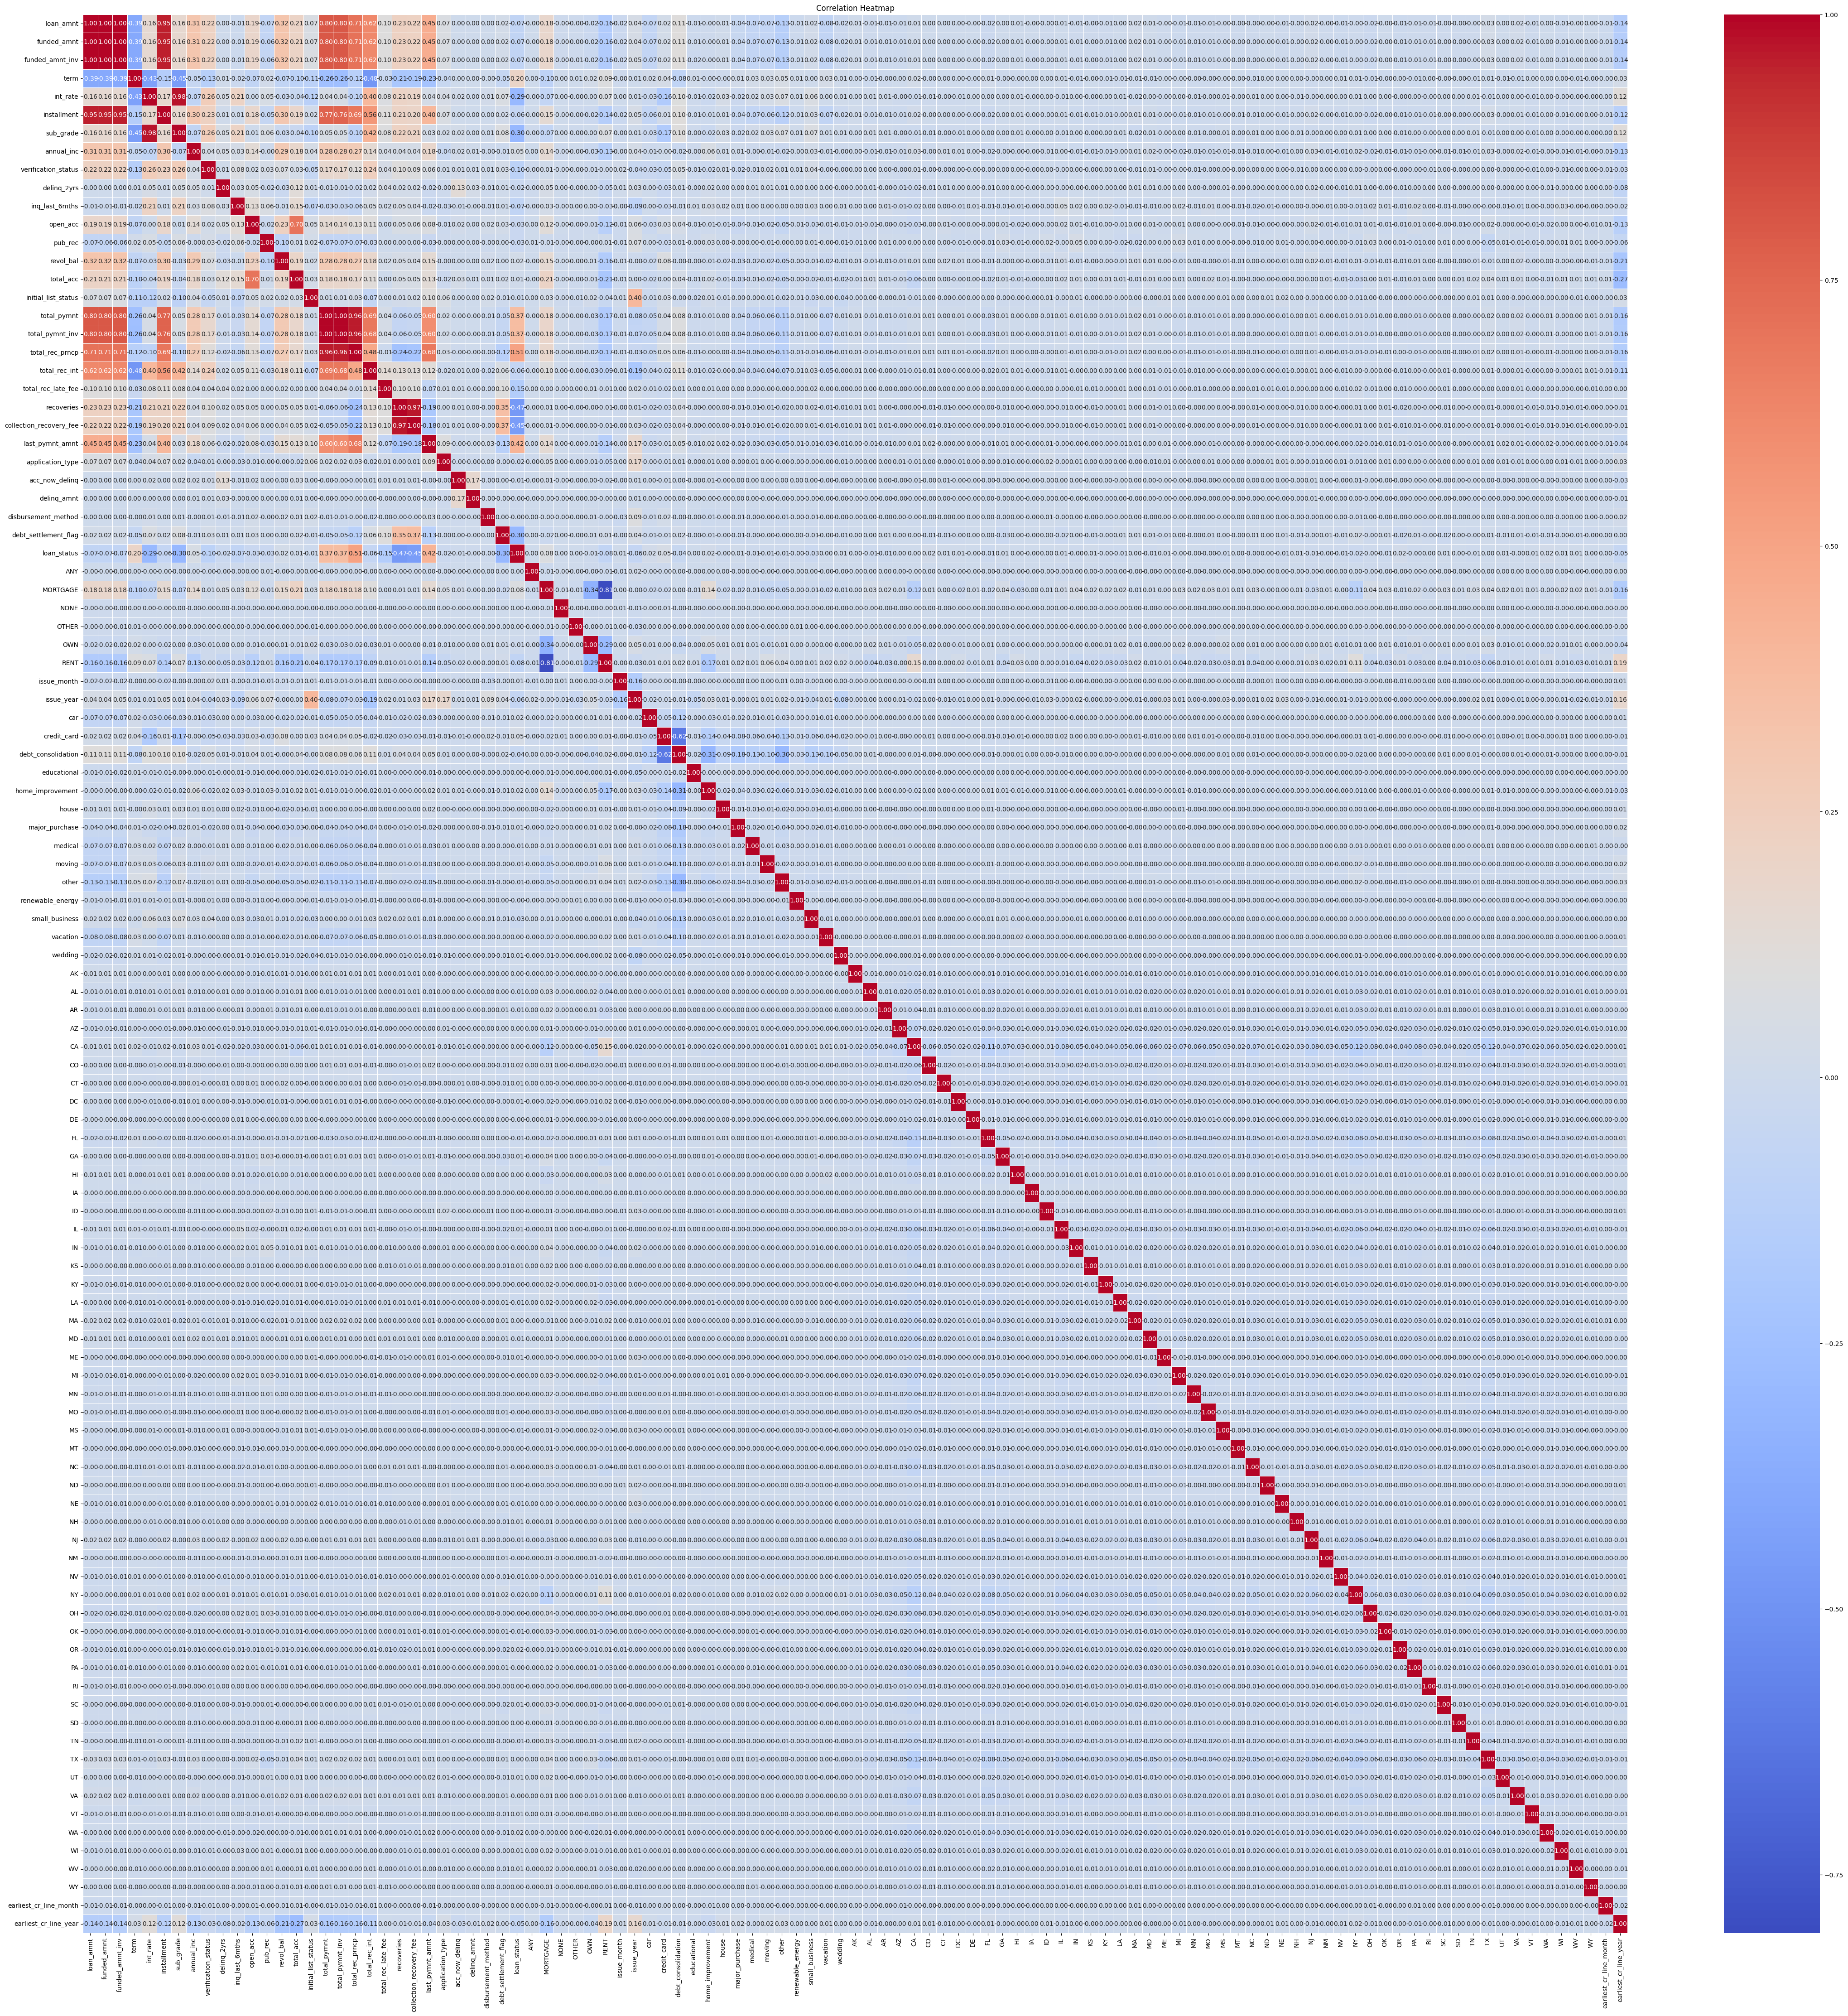

In [60]:
import matplotlib.pyplot as plt

correlation_matrix = train.corr()

plt.figure(figsize=(55 , 55))
sns.heatmap(correlation_matrix , annot=True , cmap="coolwarm" , fmt = ".2f" , linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [61]:
train.drop(columns=["installment" , "total_pymnt_inv" , "total_rec_prncp" ,"funded_amnt" , "funded_amnt_inv" , "sub_grade" , "loan_amnt"] , inplace=True)
test.drop(columns=["installment" , "total_pymnt_inv" , "total_rec_prncp" ,"funded_amnt" , "funded_amnt_inv" , "sub_grade" , "loan_amnt"] , inplace=True)
X_test.drop(columns=["installment" , "total_pymnt_inv" , "total_rec_prncp" ,"funded_amnt" , "funded_amnt_inv" , "sub_grade" , "loan_amnt"] , inplace=True)

To output multiple subplots, the figure containing the passed axes is being cleared.


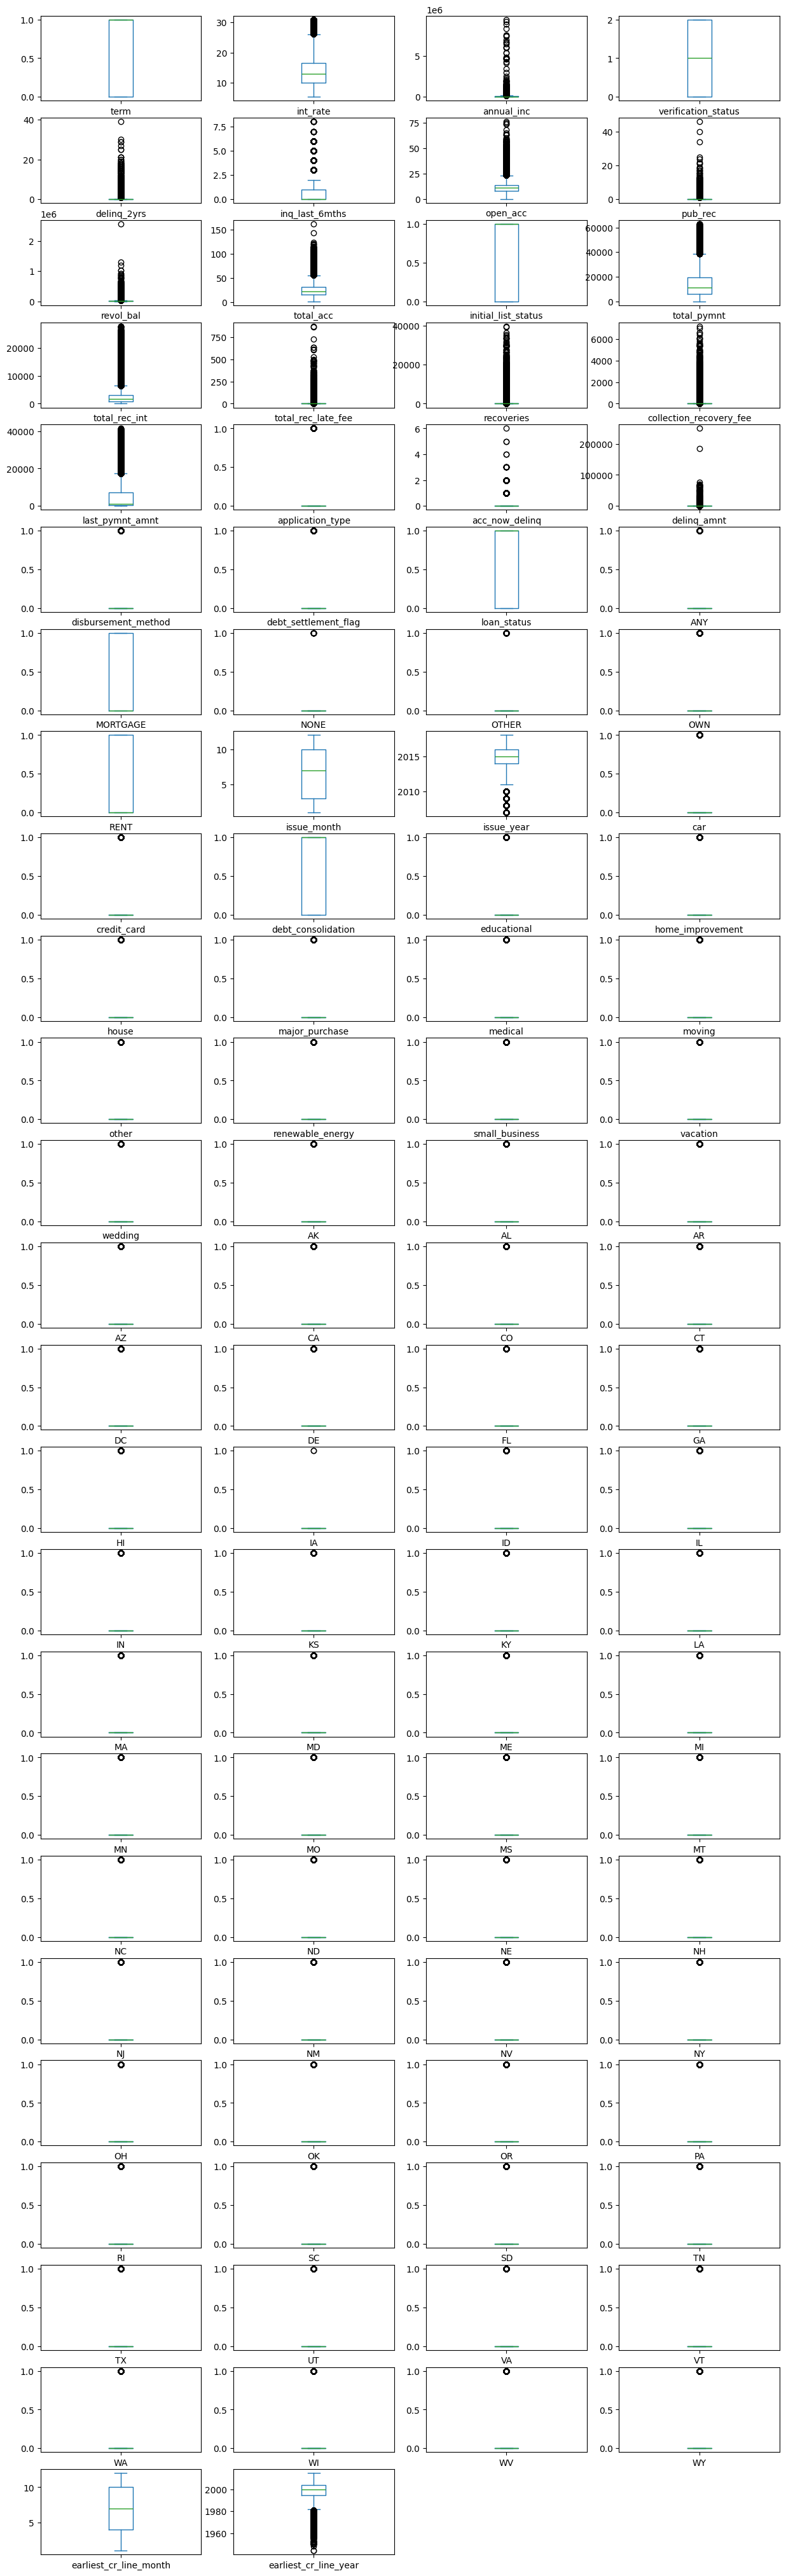

In [63]:
fig, ax = plt.subplots(figsize=(15,200))
train.plot(kind = 'box', subplots = True, layout = (96,4), sharex = False,sharey = False, ax=ax)
plt.show()

In [64]:
train.drop(columns=["MORTGAGE" , "collection_recovery_fee"] , inplace=True)
test.drop(columns=["MORTGAGE" , "collection_recovery_fee"] , inplace=True)
X_test.drop(columns=["MORTGAGE" , "collection_recovery_fee"] , inplace=True)

#### Plotting the correlation heatmap again to check whether if there are anymore correlation between the features

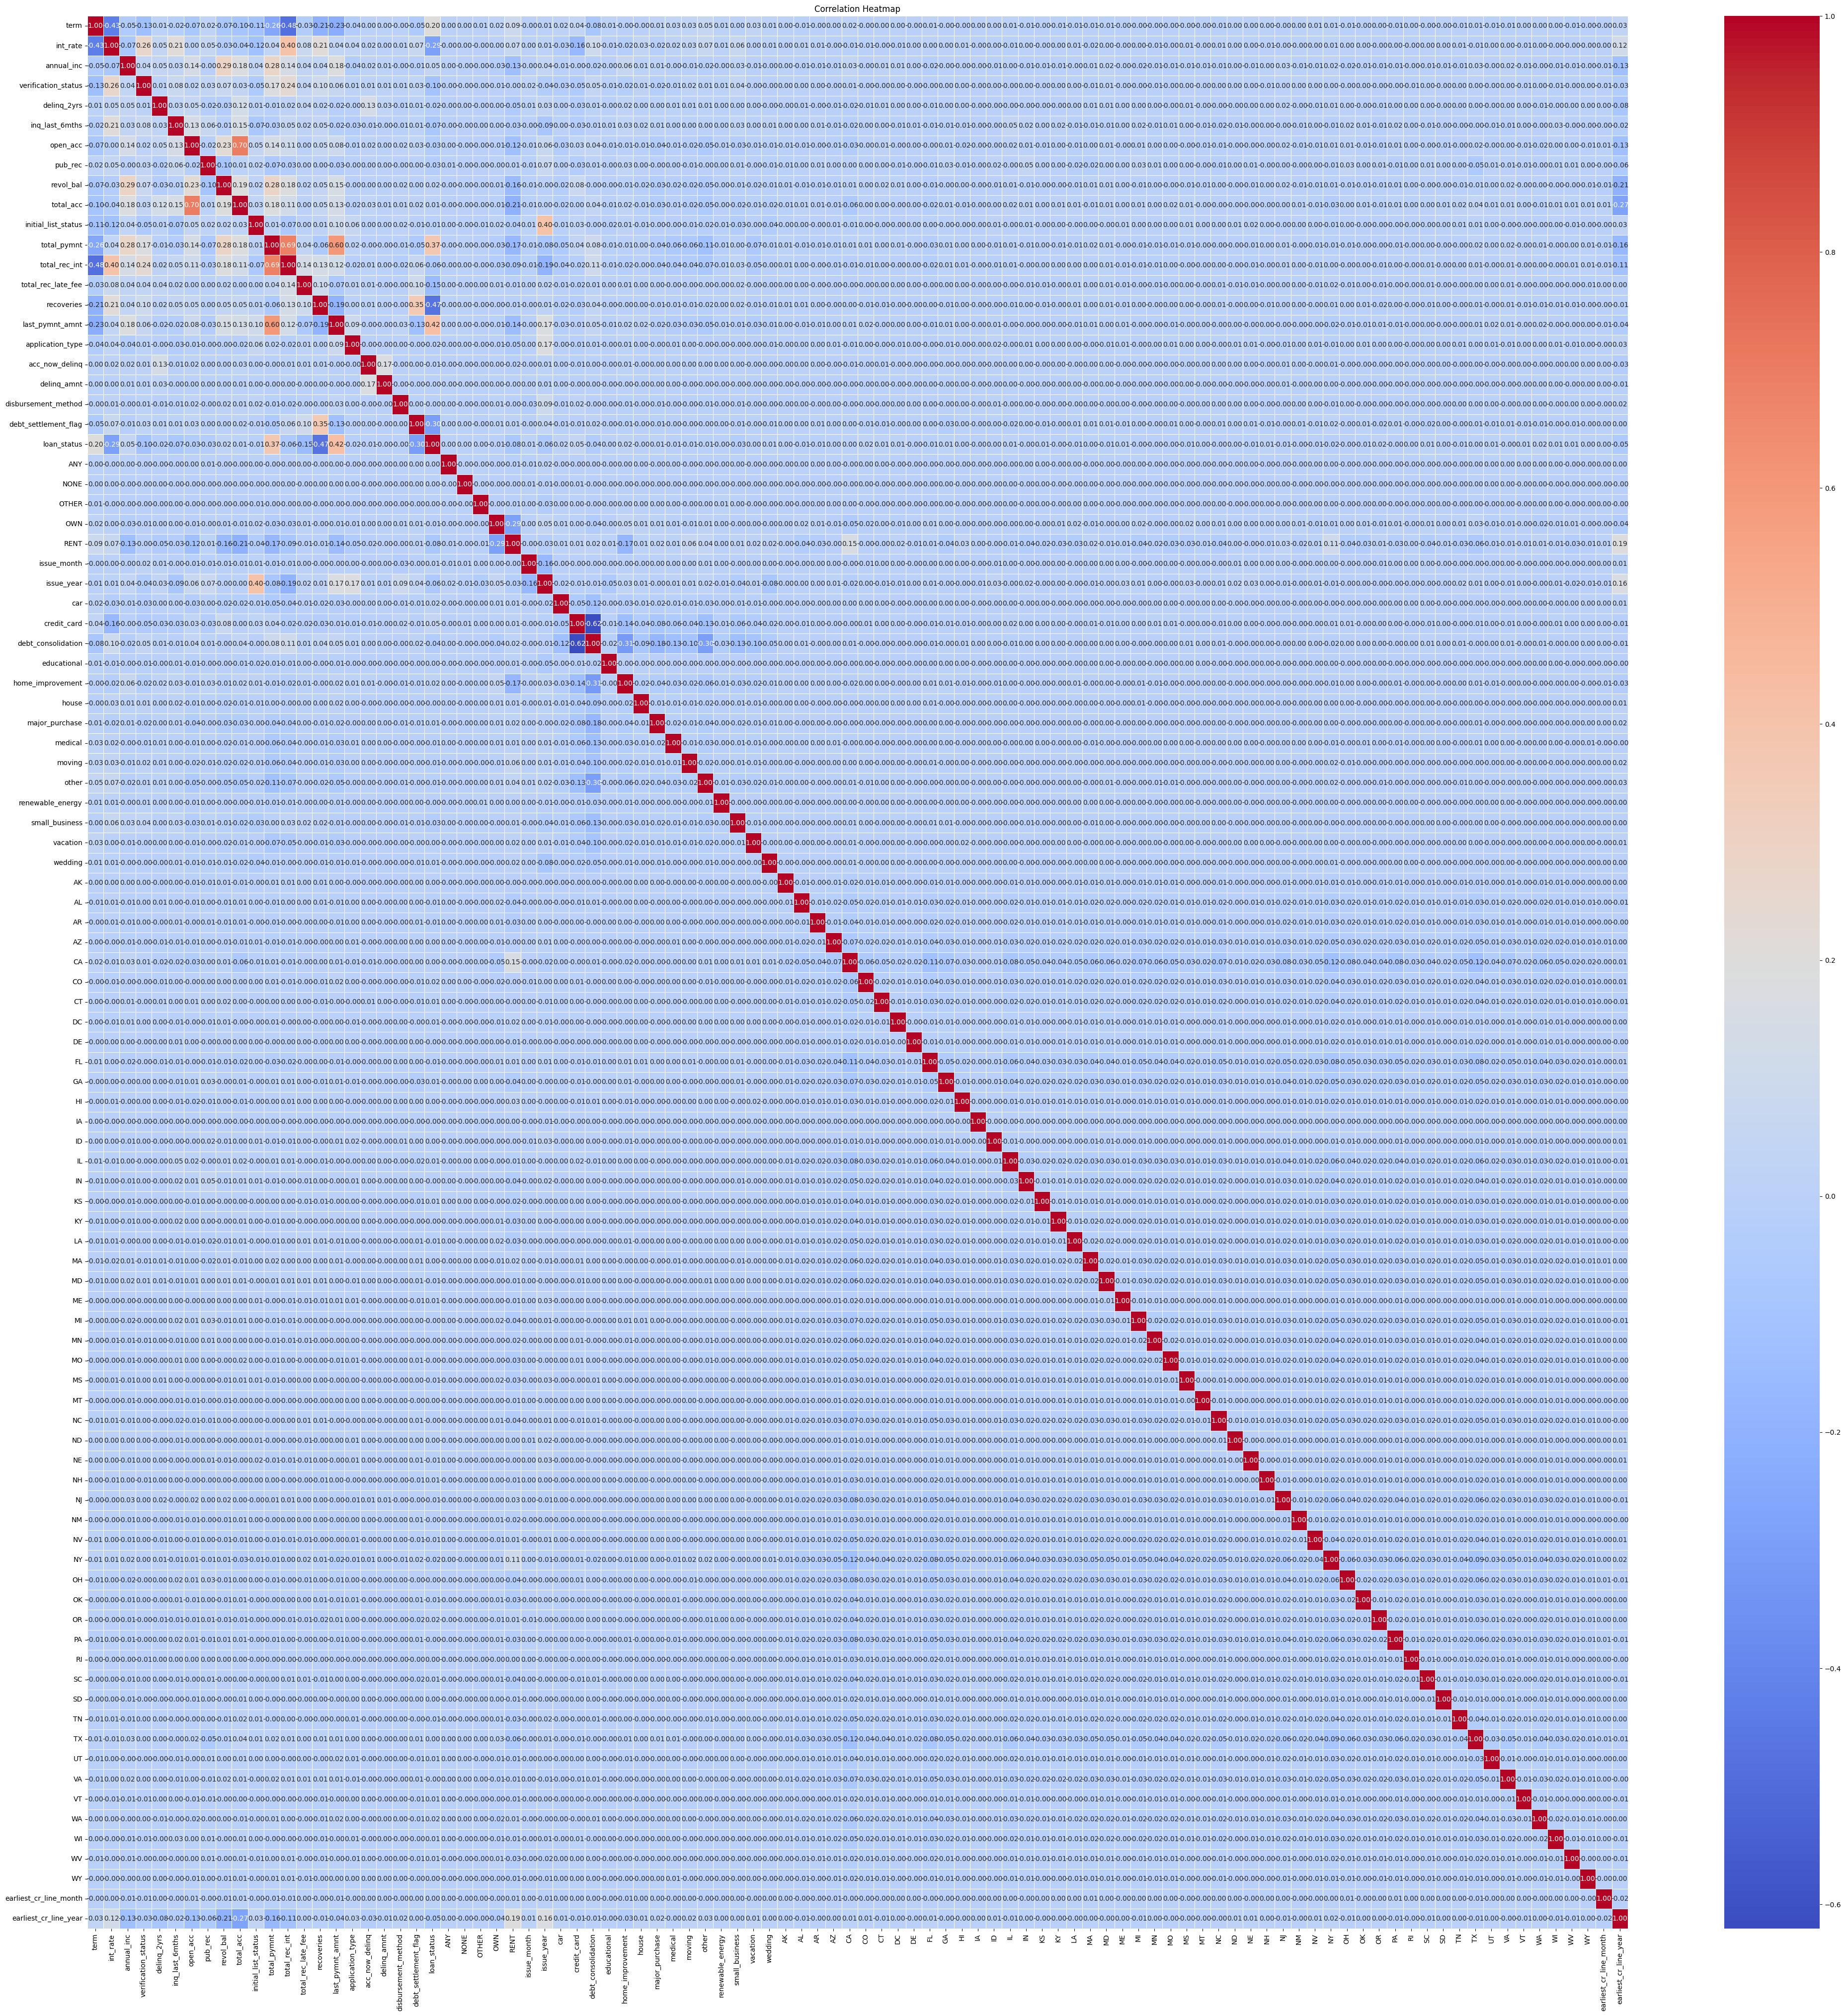

In [65]:
import matplotlib.pyplot as plt

correlation_matrix = train.corr()

plt.figure(figsize=(50 , 50))
sns.heatmap(correlation_matrix , annot=True , cmap="coolwarm" , fmt = ".2f" , linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [66]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517788 entries, 0 to 517787
Data columns (total 96 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   term                    517788 non-null  float64
 1   int_rate                517788 non-null  float64
 2   annual_inc              517788 non-null  float64
 3   verification_status     517788 non-null  int32  
 4   delinq_2yrs             517788 non-null  float64
 5   inq_last_6mths          517788 non-null  float64
 6   open_acc                517788 non-null  float64
 7   pub_rec                 517788 non-null  float64
 8   revol_bal               517788 non-null  int64  
 9   total_acc               517788 non-null  float64
 10  initial_list_status     517788 non-null  float64
 11  total_pymnt             517788 non-null  float64
 12  total_rec_int           517788 non-null  float64
 13  total_rec_late_fee      517788 non-null  float64
 14  recoveries          

#### splitting the x and y variables

In [67]:
X = train.drop(columns=train.columns[21])
Y = train.iloc[: , 21]

X_valid = test.drop(columns=test.columns[21])
Y_valid = test.iloc[: , 21]


#### check if null values exist before giving the data set to the KBest algorithm

In [68]:
null_values_exist = X.isnull().any().any()

# Print the result
if null_values_exist:
    print("Null values exist in the DataFrame.")
else:
    print("No null values found in the DataFrame.")

No null values found in the DataFrame.


#### Imputing values for the missing data using SimpleImputer considering mean

In [69]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

imputer = SimpleImputer(strategy='mean')

X_imputed = imputer.fit_transform(X)
X_valid_imputed = imputer.fit_transform(X_valid)
X_test_model_imputed = imputer.fit_transform(X_test)

# Shift the data to make all values positive
X_shifted = X_imputed - np.min(X_imputed) + 1
X_valid_shifted = X_valid_imputed - np.min(X_valid_imputed) + 1
X_test_model_shifted = X_test_model_imputed - np.min(X_test_model_imputed) + 1
    
# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Scale the shifted data
X_non_negative = scaler.fit_transform(X_shifted)
X_valid_non_negative = scaler.fit_transform(X_valid_shifted)
X_test_model_non_negative = scaler.fit_transform(X_test_model_shifted)

#### Using the KBest algorithm to select the best 25 features from the training data set

In [70]:
k_best = SelectKBest(score_func=chi2 , k=25)
X_selected = k_best.fit_transform(X_non_negative , Y)


## Training the model using XGBoost 

In [71]:
from xgboost import XGBClassifier
from numpy import loadtxt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_tr , X_te , Y_tr , Y_te = train_test_split(X_selected , Y , test_size=0.2 , random_state=0)

model =  XGBClassifier()
model.fit(X_tr , Y_tr)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

## validating the build model

In [72]:
y_pred = model.predict(X_te)

In [73]:
X_valid_selected = k_best.fit_transform(X_valid_non_negative , Y_valid)

Y_valid_pred = model.predict(X_valid_selected)

#### Getting the accuracy scores

In [74]:
accuracy = accuracy_score(Y_te , y_pred)
print(accuracy)

0.9964850615114236


In [75]:
accuracy_valid = accuracy_score(Y_valid , Y_valid_pred)
print(accuracy_valid)

0.983354191290644


## Predicting the values for the given dataset(X_test.csv)

In [76]:
X_test_selected = k_best.transform(X_test_model_non_negative)

In [77]:
Y_test_pred = model.predict(X_test_selected)

In [78]:
selected_features = k_best.get_support()
selected_columns = X_test.columns[selected_features]
selected_data = X_test[selected_columns]

In [79]:
selected_data.loc[: , 'loan_status'] = Y_test_pred
selected_data.head()


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


term  int_rate  verification_status  inq_last_6mths   total_pymnt  \
0   1.0     11.47                    1             2.0   8146.460000   
1   1.0     12.99                    1             2.0   1966.540000   
2   1.0     13.67                    2             1.0  10328.803125   
3   1.0     17.49                    2             0.0  32307.326877   
4   0.0     14.99                    2             1.0  12368.960000   

   total_rec_int  total_rec_late_fee  recoveries  last_pymnt_amnt  \
0          46.46                 0.0        0.00          8151.62   
1         310.08                 0.0      963.06           336.90   
2         878.80                 0.0        0.00          7757.04   
3        7307.33                 0.0        0.00           946.48   
4        4754.46                 0.0     1346.04           380.56   

   application_type  ...  small_business   CO   DC   MS   NV   NY   OR   SC  \
0                 0  ...             0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0   
1                 0  ...             1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2                 0  ...             0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3                 0  ...             0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4                 0  ...             0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    WA  loan_status  
0  0.0            1  
1  0.0            0  
2  0.0            1  
3  0.0            1  
4  0.0            0  

[5 rows x 26 columns]

In [80]:
last_column = selected_data.columns[-1]
final_dataset = pd.concat([selected_data[last_column] , selected_data.drop(columns=[last_column])] , axis =1)
final_dataset.head()


loan_status  term  int_rate  verification_status  inq_last_6mths  \
0            1   1.0     11.47                    1             2.0   
1            0   1.0     12.99                    1             2.0   
2            1   1.0     13.67                    2             1.0   
3            1   1.0     17.49                    2             0.0   
4            0   0.0     14.99                    2             1.0   

    total_pymnt  total_rec_int  total_rec_late_fee  recoveries  \
0   8146.460000          46.46                 0.0        0.00   
1   1966.540000         310.08                 0.0      963.06   
2  10328.803125         878.80                 0.0        0.00   
3  32307.326877        7307.33                 0.0        0.00   
4  12368.960000        4754.46                 0.0     1346.04   

   last_pymnt_amnt  ...  home_improvement  small_business   CO   DC   MS   NV  \
0          8151.62  ...               0.0             0.0  0.0  0.0  0.0  1.0   
1           336.90  ...               0.0             1.0  0.0  0.0  0.0  0.0   
2          7757.04  ...               0.0             0.0  0.0  0.0  0.0  0.0   
3           946.48  ...               0.0             0.0  0.0  0.0  0.0  0.0   
4           380.56  ...               0.0             0.0  0.0  0.0  0.0  0.0   

    NY   OR   SC   WA  
0  0.0  0.0  0.0  0.0  
1  0.0  0.0  0.0  0.0  
2  0.0  0.0  0.0  0.0  
3  0.0  0.0  0.0  0.0  
4  0.0  0.0  0.0  0.0  

[5 rows x 26 columns]

In [81]:
final_dataset.to_csv('210613U.csv' , index=False)

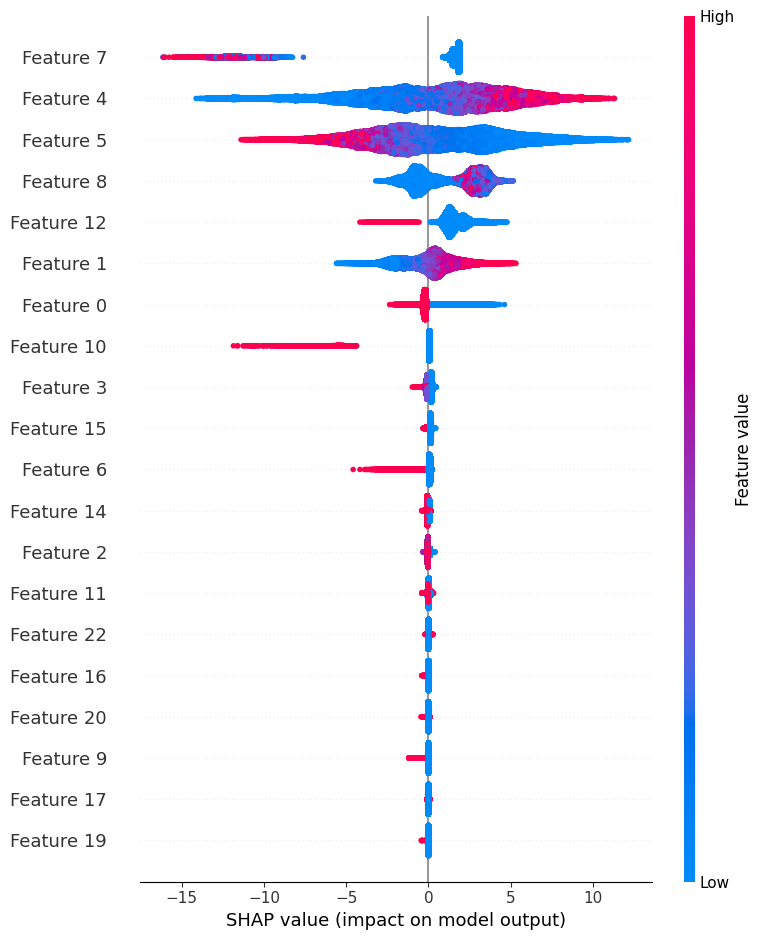

In [82]:
explainer = shap.Explainer(model)
shap_values = explainer.shap_values(X_test_selected)
shap.summary_plot(shap_values , X_test_selected)

In [86]:
column_names = X_test_selected.columns.tolist()
shap.decision_plot(explainer.expected_value, shap_values[1], feature_names=column_names)

AttributeError: 'numpy.ndarray' object has no attribute 'columns'